In [1]:
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt
import pickle

In [14]:
file_path = r'C:\Users\HHGiang\Documents\KEIO\3FZ\Giang.report1.xlsx'
data = pd.read_excel(file_path)
data.head()

,DATE,AAPL,ABT,ADBE,AMD,AMGN,AMZN,ARE,ATGE,AVB,...,VRTX,VTR,VZ,WBA,WELL,WFC,WMT,XOM,^GSPC,^IRX
0,2013-11-01,0.061887,0.048122,0.046134,0.086013,-0.017896,0.078150,-0.039063,-0.010078,-0.053294,...,-0.027422,-0.138008,-0.006507,-0.000676,-0.146904,0.030680,0.054020,0.042169,0.027663,0.510826
1,2013-12-01,0.014684,0.003659,0.053158,0.061271,0.004162,0.013049,0.005675,-0.001126,-0.002788,...,0.067936,0.007887,-0.009721,-0.024968,-0.032019,0.037930,-0.029056,0.086132,0.023289,0.135802
2,2014-01-01,-0.113949,-0.044547,-0.011590,-0.120694,0.041803,-0.105977,0.108108,0.022696,0.052662,...,0.061843,0.098407,-0.023056,-0.001568,0.078073,-0.001322,-0.046500,-0.093572,-0.036231,-1.840550
3,2014-02-01,0.049950,0.087253,0.147977,0.078472,0.041739,0.009462,0.032546,0.150507,0.043339,...,0.022765,0.000641,0.001604,0.169599,0.014058,0.023540,0.000268,0.043631,0.042213,1.458615
4,2014-03-01,0.025725,-0.032446,-0.043022,0.077759,-0.000415,-0.073709,0.001517,0.009005,0.018057,...,-0.133991,-0.030246,-0.000210,-0.023836,0.028603,0.075802,0.022895,0.021598,0.006908,-0.428996


In [43]:
relevant_stocks = ['T', 'VZ', 'TMUS', 'CMCSA', 'CHTR', 'TDS', '^GSPC','^IRX']
relevant_data = data[relevant_stocks]

# Create a new DataFrame
reldf = pd.DataFrame(relevant_data)
reldf.head()

,T,VZ,TMUS,CMCSA,CHTR,TDS,^GSPC,^IRX
0,-0.010050,-0.006507,-0.064034,0.046587,0.007877,-0.114381,0.027663,0.510826
1,-0.001421,-0.009721,0.257235,0.041247,0.012212,-0.075796,0.023289,0.135802
2,-0.053751,-0.023056,-0.095697,0.050389,0.001753,0.052165,-0.036231,-1.840550
3,-0.025032,0.001604,-0.002292,-0.052019,-0.077607,-0.170255,0.042213,1.458615
4,0.093800,-0.000210,0.079690,-0.032442,-0.028565,0.139819,0.006908,-0.428996


<Axes: >

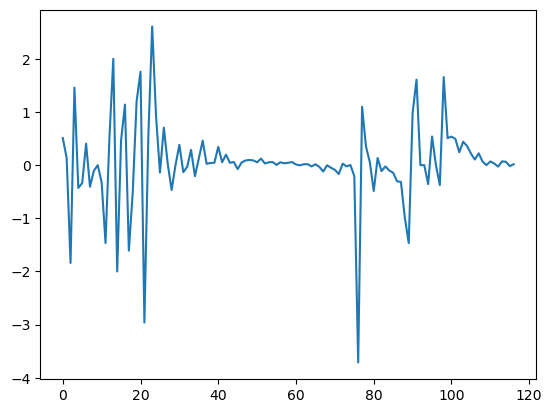

In [45]:
data['^IRX'].plot()

<Axes: >

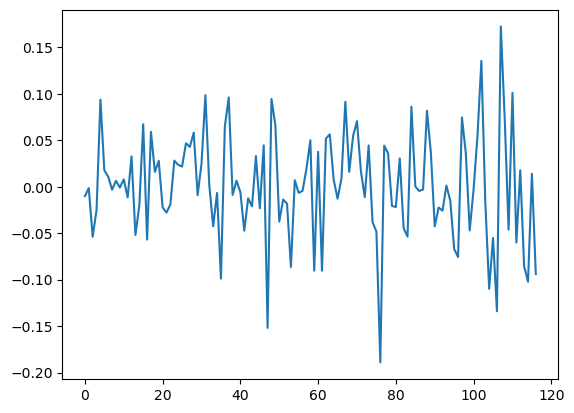

In [5]:
data['T'].plot()

<Axes: >

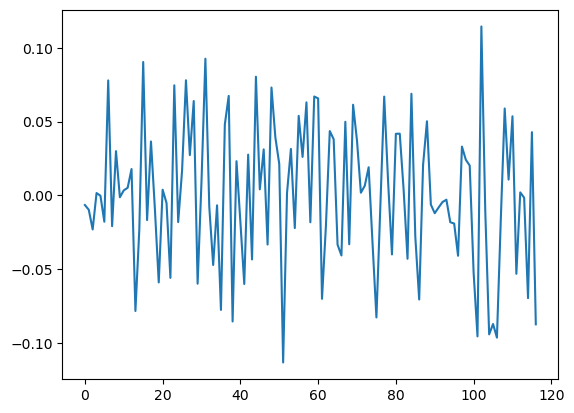

In [6]:
data['VZ'].plot()

<Axes: >

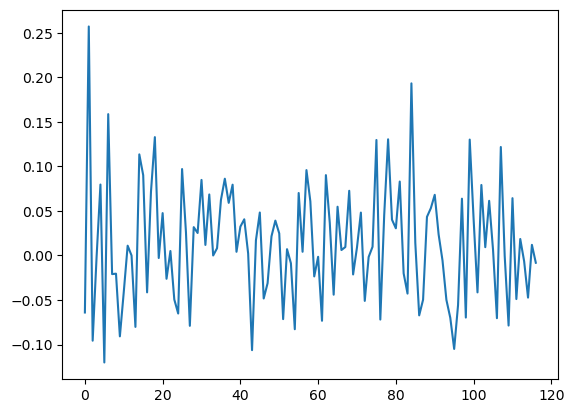

In [7]:
data['TMUS'].plot()

<Axes: >

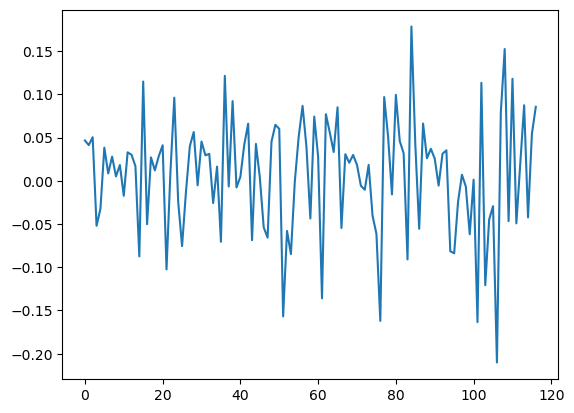

In [8]:
data['CMCSA'].plot()

<Axes: >

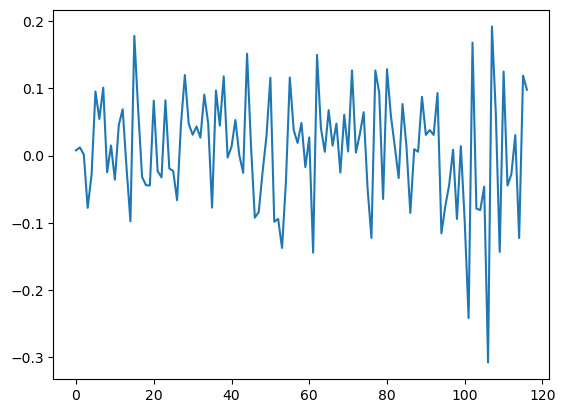

In [9]:
data['CHTR'].plot()

<Axes: >

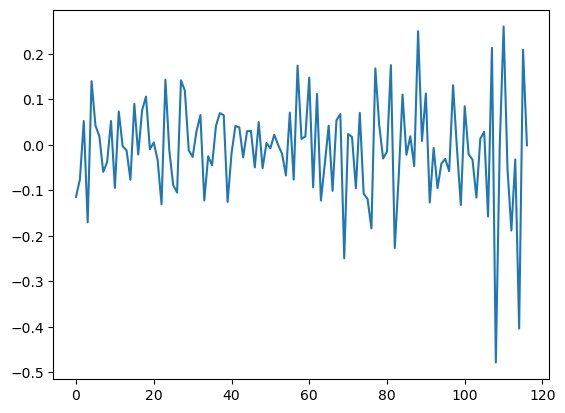

In [11]:
data['TDS'].plot()

<Axes: >

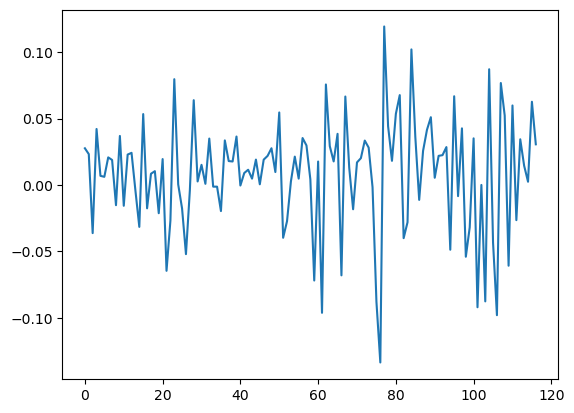

In [12]:
data['^GSPC'].plot()

In [23]:
from statsmodels.tsa.stattools import adfuller

In [46]:
# ['T', 'VZ', 'TMUS', 'CMCSA', 'CHTR', 'TDS', '^GSPC']
datatest = adfuller(reldf['^IRX'], autolag = 'AIC')
print('1. ADF :', datatest[0] )
print('2. p-value :', datatest[1]) # == 0.000 so stationary
print('3. num of lags :', datatest[2])
print('4. num of obs :', datatest[3])
print('5. critical values :', datatest[4])
for key, val in datatest[4].items():
    print("\t", key, ': ', val)

1. ADF : -4.953359940472965
2. p-value : 2.7426674817040366e-05
3. num of lags : 3
4. num of obs : 113
5. critical values : {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}
	 1% :  -3.489589552580676
	 5% :  -2.887477210140433
	 10% :  -2.580604145195395


In [24]:
# ['T', 'VZ', 'TMUS', 'CMCSA', 'CHTR', 'TDS', '^GSPC']
datatest = adfuller(reldf['T'], autolag = 'AIC')
print('1. ADF :', datatest[0] )
print('2. p-value :', datatest[1]) # == 0.000 so stationary
print('3. num of lags :', datatest[2])
print('4. num of obs :', datatest[3])
print('5. critical values :', datatest[4])
for key, val in datatest[4].items():
    print("\t", key, ': ', val)

1. ADF : -11.096327595756607
2. p-value : 3.965454208240597e-20
3. num of lags : 0
4. num of obs : 116
5. critical values : {'1%': -3.4880216384691867, '5%': -2.8867966864160075, '10%': -2.5802408234244947}
	 1% :  -3.4880216384691867
	 5% :  -2.8867966864160075
	 10% :  -2.5802408234244947


In [25]:
# ['T', 'VZ', 'TMUS', 'CMCSA', 'CHTR', 'TDS', '^GSPC']
datatest = adfuller(reldf['VZ'], autolag = 'AIC')
print('1. ADF :', datatest[0] )
print('2. p-value :', datatest[1]) # == 0.000 so stationary
print('3. num of lags :', datatest[2])
print('4. num of obs :', datatest[3])
print('5. critical values :', datatest[4])
for key, val in datatest[4].items():
    print("\t", key, ': ', val)

1. ADF : -9.21165695525348
2. p-value : 1.8806280733959254e-15
3. num of lags : 1
4. num of obs : 115
5. critical values : {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}
	 1% :  -3.4885349695076844
	 5% :  -2.887019521656941
	 10% :  -2.5803597920604915


In [26]:
# ['T', 'VZ', 'TMUS', 'CMCSA', 'CHTR', 'TDS', '^GSPC']
datatest = adfuller(reldf['TMUS'], autolag = 'AIC')
print('1. ADF :', datatest[0] )
print('2. p-value :', datatest[1]) # == 0.000 so stationary
print('3. num of lags :', datatest[2])
print('4. num of obs :', datatest[3])
print('5. critical values :', datatest[4])
for key, val in datatest[4].items():
    print("\t", key, ': ', val)

1. ADF : -5.52996202134677
2. p-value : 1.7968323402763268e-06
3. num of lags : 2
4. num of obs : 114
5. critical values : {'1%': -3.489057523907491, '5%': -2.887246327182993, '10%': -2.5804808802708528}
	 1% :  -3.489057523907491
	 5% :  -2.887246327182993
	 10% :  -2.5804808802708528


In [27]:
# ['T', 'VZ', 'TMUS', 'CMCSA', 'CHTR', 'TDS', '^GSPC']
datatest = adfuller(reldf['CMCSA'], autolag = 'AIC')
print('1. ADF :', datatest[0] )
print('2. p-value :', datatest[1]) # == 0.000 so stationary
print('3. num of lags :', datatest[2])
print('4. num of obs :', datatest[3])
print('5. critical values :', datatest[4])
for key, val in datatest[4].items():
    print("\t", key, ': ', val)

1. ADF : -12.300881763939916
2. p-value : 7.455146315726086e-23
3. num of lags : 0
4. num of obs : 116
5. critical values : {'1%': -3.4880216384691867, '5%': -2.8867966864160075, '10%': -2.5802408234244947}
	 1% :  -3.4880216384691867
	 5% :  -2.8867966864160075
	 10% :  -2.5802408234244947


In [28]:
# ['T', 'VZ', 'TMUS', 'CMCSA', 'CHTR', 'TDS', '^GSPC']
datatest = adfuller(reldf['CHTR'], autolag = 'AIC')
print('1. ADF :', datatest[0] )
print('2. p-value :', datatest[1]) # == 0.002 so stationary
print('3. num of lags :', datatest[2])
print('4. num of obs :', datatest[3])
print('5. critical values :', datatest[4])
for key, val in datatest[4].items():
    print("\t", key, ': ', val)

1. ADF : -3.8539807311933925
2. p-value : 0.0024008744697868053
3. num of lags : 4
4. num of obs : 112
5. critical values : {'1%': -3.4901313156261384, '5%': -2.8877122815688776, '10%': -2.5807296460459184}
	 1% :  -3.4901313156261384
	 5% :  -2.8877122815688776
	 10% :  -2.5807296460459184


In [29]:
# ['T', 'VZ', 'TMUS', 'CMCSA', 'CHTR', 'TDS', '^GSPC']
datatest = adfuller(reldf['TDS'], autolag = 'AIC')
print('1. ADF :', datatest[0] )
print('2. p-value :', datatest[1]) # == 0.000 so stationary
print('3. num of lags :', datatest[2])
print('4. num of obs :', datatest[3])
print('5. critical values :', datatest[4])
for key, val in datatest[4].items():
    print("\t", key, ': ', val)

1. ADF : -10.020691605440334
2. p-value : 1.682164340747212e-17
3. num of lags : 1
4. num of obs : 115
5. critical values : {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}
	 1% :  -3.4885349695076844
	 5% :  -2.887019521656941
	 10% :  -2.5803597920604915


In [30]:
# ['T', 'VZ', 'TMUS', 'CMCSA', 'CHTR', 'TDS', '^GSPC']
datatest = adfuller(reldf['^GSPC'], autolag = 'AIC')
print('1. ADF :', datatest[0] )
print('2. p-value :', datatest[1]) # == 0.000 so stationary
print('3. num of lags :', datatest[2])
print('4. num of obs :', datatest[3])
print('5. critical values :', datatest[4])
for key, val in datatest[4].items():
    print("\t", key, ': ', val)

1. ADF : -9.365540599002015
2. p-value : 7.618122376442059e-16
3. num of lags : 1
4. num of obs : 115
5. critical values : {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}
	 1% :  -3.4885349695076844
	 5% :  -2.887019521656941
	 10% :  -2.5803597920604915


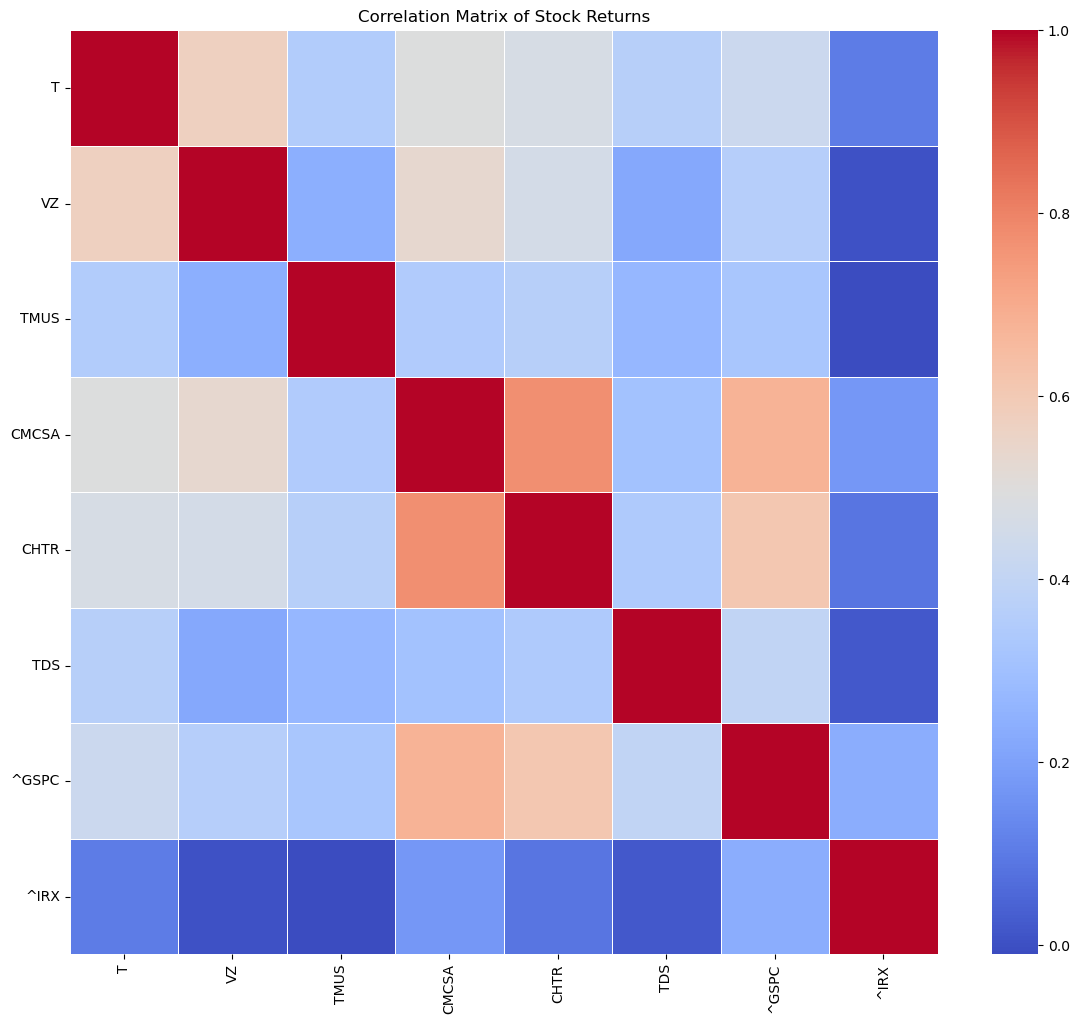

In [52]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = reldf.corr()

# Create a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

# Customize the heatmap appearance
plt.title('Correlation Matrix of Stock Returns')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal

plt.show()

In [48]:
model = smt.VAR(reldf)
res = model.select_order(maxlags=10)
print(res.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0      -41.75*     -41.55*  7.348e-19*     -41.67*
1       -41.32      -39.53   1.133e-18      -40.60
2       -40.81      -37.42   1.924e-18      -39.44
3       -40.40      -35.41   3.050e-18      -38.38
4       -39.90      -33.31   5.542e-18      -37.23
5       -39.56      -31.37   9.131e-18      -36.24
6       -39.34      -29.55   1.474e-17      -35.37
7       -39.09      -27.70   2.815e-17      -34.47
8       -39.75      -26.76   2.596e-17      -34.48
9       -40.45      -25.86   3.044e-17      -34.53
10      -41.58      -25.40   3.575e-17      -35.02
--------------------------------------------------


In [34]:
res0 = model.fit(maxlags=0)
print(res0.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 27, Oct, 2023
Time:                     01:31:13
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -40.8381
Nobs:                     117.000    HQIC:                  -40.9363
Log likelihood:           1243.59    FPE:                1.55757e-18
AIC:                     -41.0034    Det(Omega_mle):     1.46749e-18
--------------------------------------------------------------------
Results for equation T
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.000851         0.005393            0.158           0.875

Results for equation VZ
           coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------

In [33]:
from statsmodels.tsa.stattools import grangercausalitytests

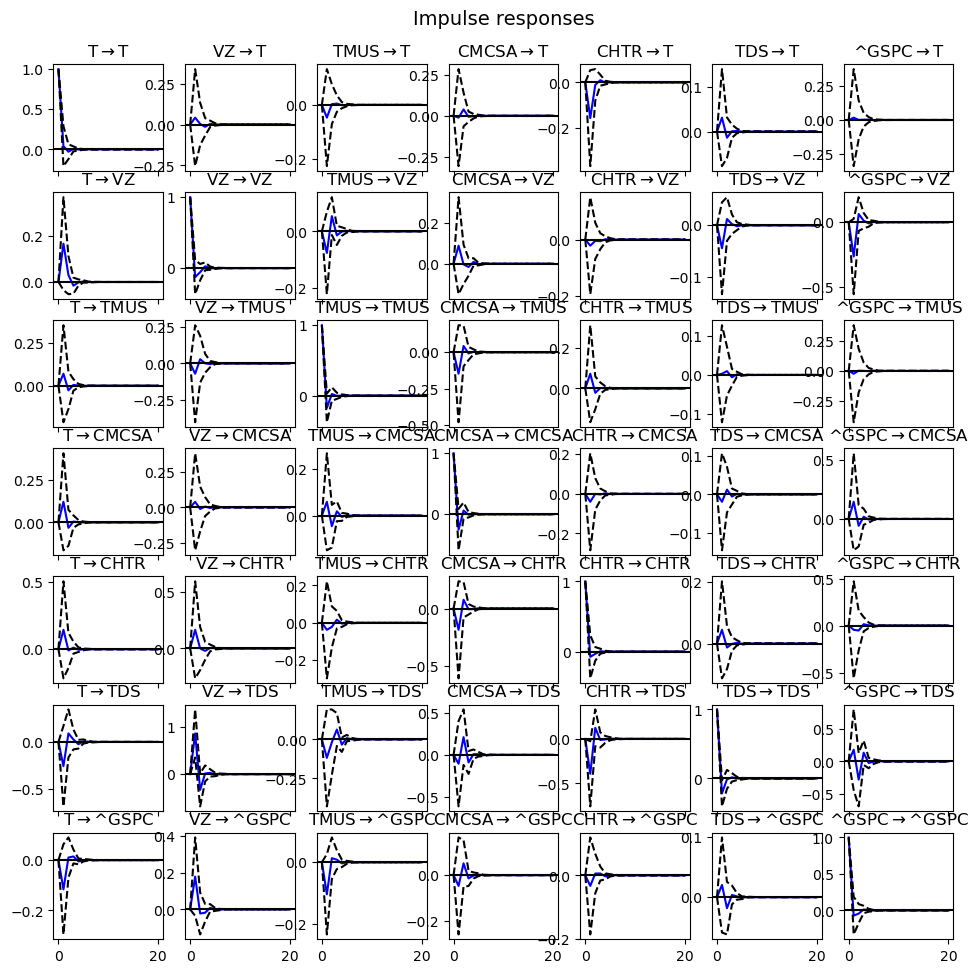

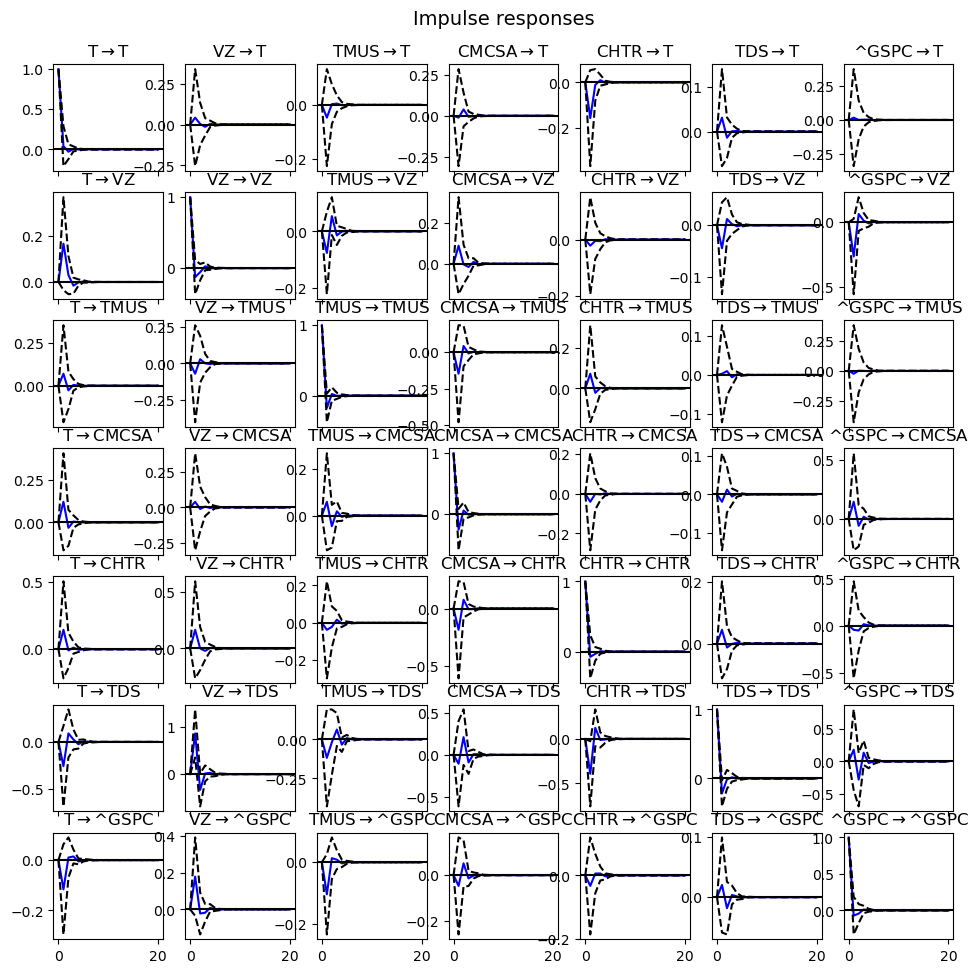

In [42]:
irf = res1.irf(20)
irf.plot()

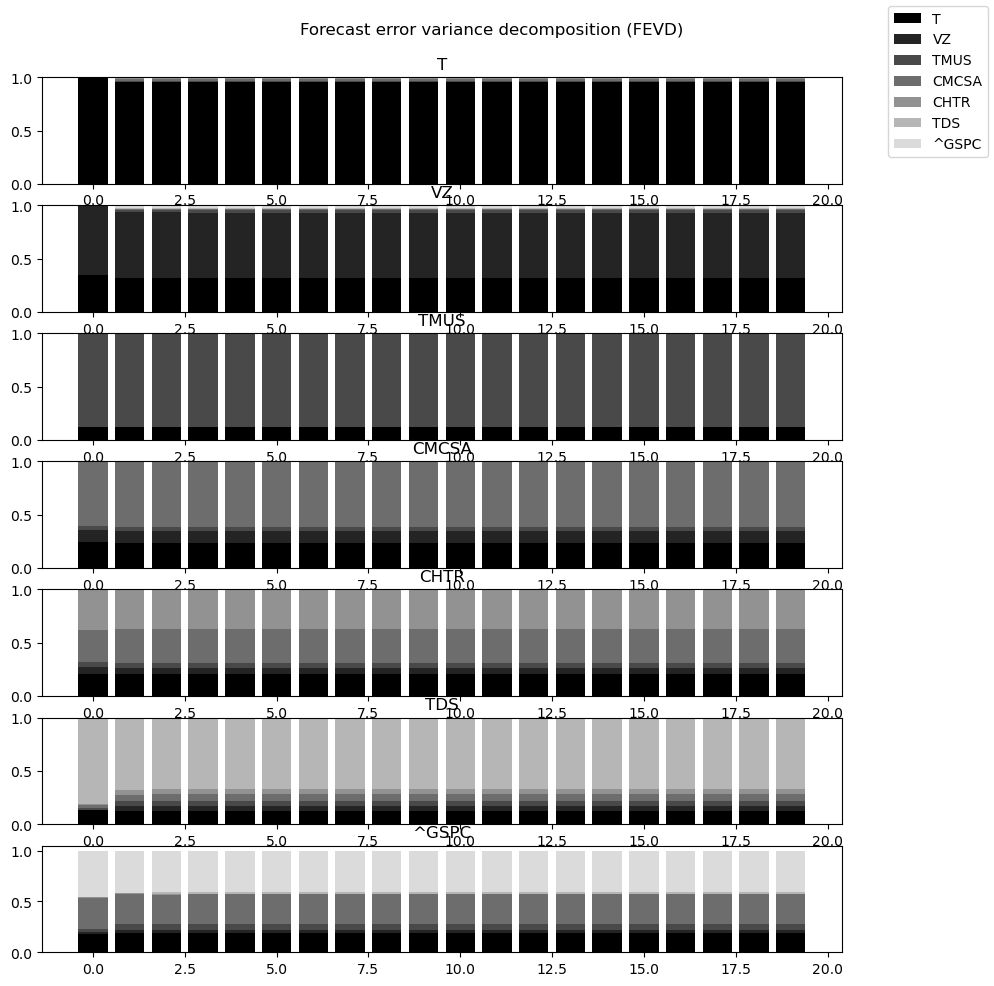

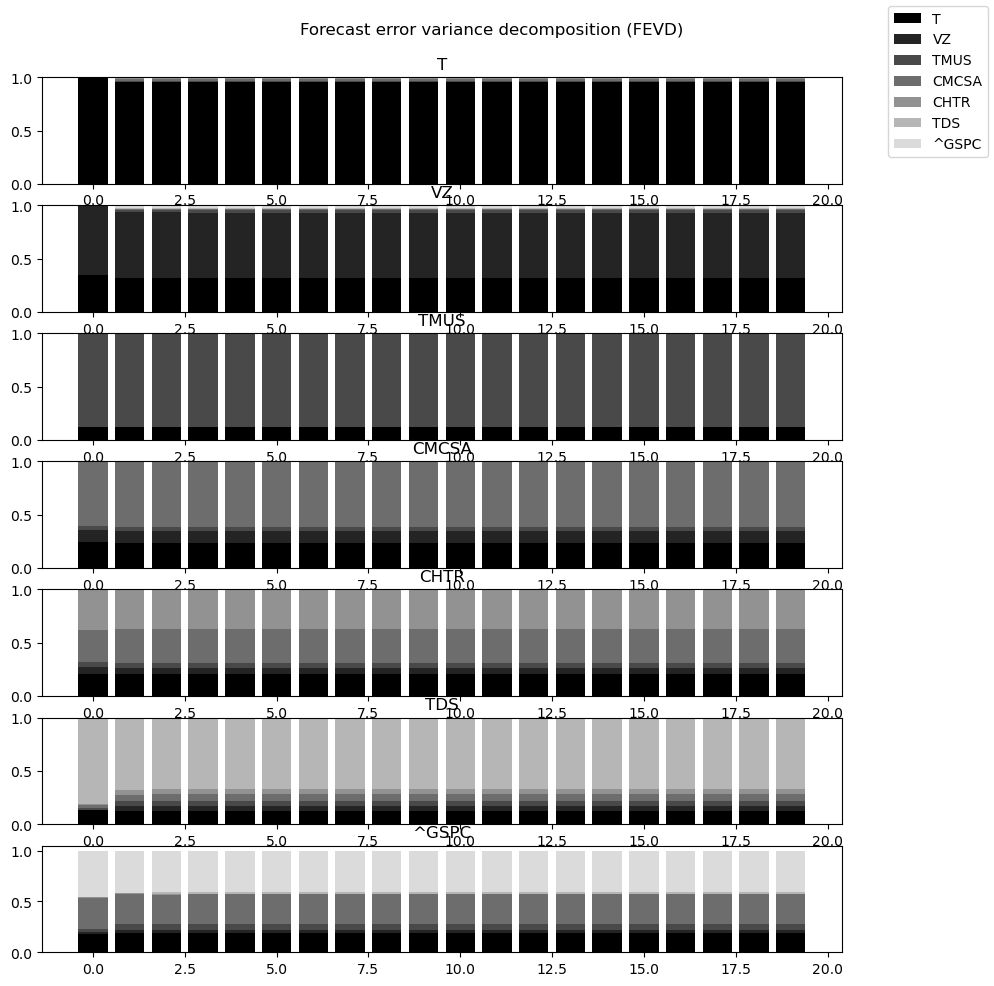

In [50]:
fevd = res1.fevd(20)
fevd.plot()